### Single Qubit Circuits

In [17]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qutip import *

#### 1. Single qubit circuit:

Base states : |0>, |1>

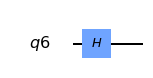

In [18]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(0)
qc.draw(output='mpl')

In [19]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


#### 1.1. Gates in series

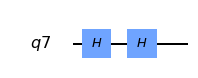

In [20]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(0)
qc.h(0)
qc.draw(output='mpl')

In [21]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[1.-0.j 0.+0.j]
 [0.+0.j 1.-0.j]]


In [32]:
H = np.array([[ 0.707+0.j,  0.707-0.j],[ 0.707+0.j, -0.707+0.j]])
np.dot(H,H)

array([[ 9.99698000e-01+0.j, -1.37436729e-17+0.j],
       [-1.37436729e-17+0.j,  9.99698000e-01+0.j]])

----------

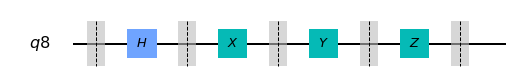

In [36]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.barrier()
qc0 = qc.copy()
qc.h(0)
qc.barrier()
qc1 = qc.copy()
qc.x(0)
qc.barrier()
qc2 = qc.copy()
qc.y(0)
qc.barrier()
qc3 = qc.copy()
qc.z(0)
qc.barrier()
qc4 = qc.copy()
qc.draw(output='mpl')

In [37]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[ 0.-0.707j -0.-0.707j]
 [-0.-0.707j  0.+0.707j]]


#### Operator =  Z.Y.X.H

In [35]:
X = sigmax()
Y = sigmay()
Z = sigmaz()
H = np.array([[ 0.707+0.j,  0.707-0.j],[ 0.707+0.j, -0.707+0.j]])
np.dot(np.dot(Z,Y),np.dot(X,H))

array([[0.-0.707j, 0.-0.707j],
       [0.-0.707j, 0.+0.707j]])

- Why is order reversed?

$ZYXH|\psi_0\rangle = ZYX|\psi_1\rangle = ZY|\psi_2\rangle = Z|\psi_3\rangle =|\psi_4\rangle $

In [39]:
backend = Aer.get_backend('statevector_simulator')
for qc in [qc0,qc1,qc2,qc3,qc4]:
    out = execute(qc,backend).result().get_statevector()
    print(out)

[1.+0.j 0.+0.j]
[0.70710678+0.j 0.70710678+0.j]
[0.70710678+0.j 0.70710678+0.j]
[0.-0.70710678j 0.+0.70710678j]
[ 0.-0.70710678j -0.-0.70710678j]
